In [84]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

# Pkg.add("CairoMakie");

  Activating project at `~/Documents/eth_courses/notebooks/control`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Qhull_jll ─────── v8.0.1003+0
   Installed Imath_jll ─────── v3.1.7+0
   Installed SIMD ──────────── v3.4.5
   Installed Ratios ────────── v0.4.4
   Installed TiffImages ────── v0.6.4
   Installed PaddedViews ───── v0.5.12
   Installed OpenEXR_jll ───── v3.1.4+0
   Installed KernelDensity ─── v0.6.7
   Installed FileIO ────────── v1.16.1
   Installed CairoMakie ────── v0.10.5
   Installed GeometryBasics ── v0.4.7
   Installed PrecompileTools ─ v1.1.1
   Installed StructArrays ──── v0.6.15
   Installed GeoInterface ──── v1.3.1
   Installed MathTeXEngine ─── v0.5.6
   Installed Makie ─────────── v0.19.5
    Updating `~/Documents/eth_courses/notebooks/control/Project.toml`
  [13f3f980] + CairoMakie v0.10.5
    Updating `~/Documents/eth_courses/notebooks/control/Manifest.toml`
  [1520ce14] + AbstractTrees v0.4.4
  [27a

In [85]:
using LinearAlgebra, ControlSystemsBase, ControlSystems
using CairoMakie

In [13]:
μ = 3.9860e+14;
R = 7000000;
m = 300;

ω_n = (1/R) * sqrt(μ / R);

N_t = 288;

V = 1.0e-03 * [0.0010
                0.0010
                0.0010
                1.0000
                1.0000
                1.0000];

V = diagm(V);

In [77]:
# Create system

Ts = 600;

Ac = [
    0 0 0 1 0 0;
    0 0 0 0 1 0; 
    0 0 0 0 0 1;
    3*ω_n^2 0 0 0 2*ω_n 0;
    0 0 0 -2*ω_n 0 0; 
    0 0 -ω_n^2 0 0 0];

Bc = [
    0 0 0;
    0 0 0;
    0 0 0;
    1/m 0 0;
    0  1/m 0;
    0 0 1/m];

C = I(6)

sys_c = ss(Ac,Bc,C,0);
sys_d = c2d(sys_c, Ts);

# rescaling
A = V*sys_d.A*inv(V);
B = V*sys_d.B;

sys_dr = ss(A,B,C,0,Ts);

## Discrete Controller design

In [78]:
# Q       = I # Weighting matrix for state
q = [94, 0.1579, 300, 0.01, 0.1, 0.1]
Q = diagm(q);
R       = I # Weighting matrix for input

K       = lqr(sys_dr,Q,R) # lqr(sys,Q,R) can also be used

3×6 Matrix{Float64}:
  8.26224  -0.034842   0.0      3.94422    4.45247  -0.0
 91.5987   -0.377158   0.0     -0.627237  46.2723   -0.0
 -0.0      -0.0       -5.0372  -0.0       -0.0      15.1127

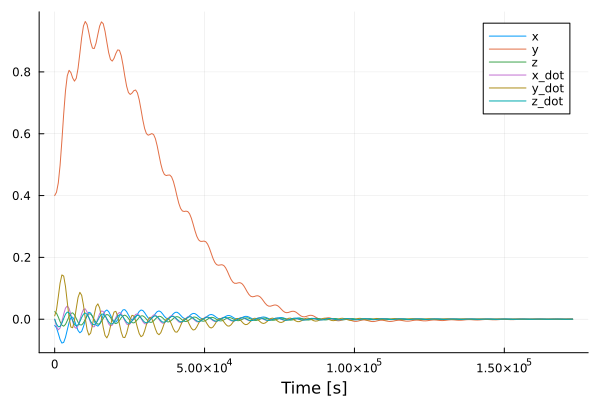

In [82]:
u(x,i)  = -K*x  # Form control law (u is a function of t and x), a constant input disturbance is affecting the system from t≧2.5
u3(x,t) = [0,0,0]

t       = 0:Ts:N_t*Ts              # Time vector
x0      = [-0.0200, 0.4000, 0.0244, 0, 0.0108, 0]               

# Simulation
y, t, x, uout = lsim(sys_dr,u,t,x0=x0)

plot(t,x', lab=["x" "y" "z" "x_dot" "y_dot" "z_dot"], xlabel="Time [s]")

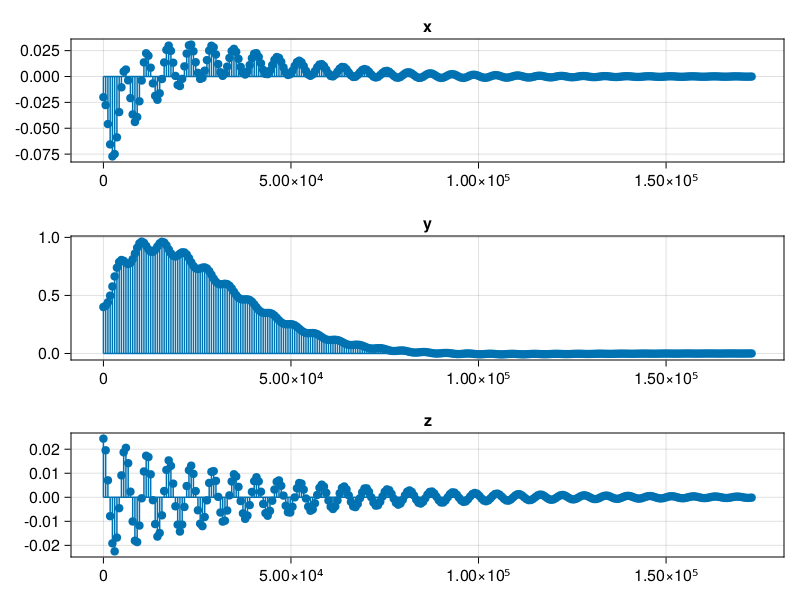

In [108]:
fig = Figure(resolution = (800, 600))

ax1 = Axis(fig[1, 1], title = "x")
ax2 = Axis(fig[2, 1], title = "y")
ax3 = Axis(fig[3, 1], title = "z")

stem!(ax1, t, x[1,:])
stem!(ax2, t, x[2,:])
stem!(ax3, t, x[3,:])

fig